```{contents}
```


### **Workflows**

#### **1. Standardization of Data**

* **What it is:** PCA is sensitive to the scale of variables. Features with larger scales can dominate the principal components.
* **How it’s done:** Subtract the mean and divide by standard deviation for each feature:

$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

* **Intuition:** Imagine mixing apples and oranges in a basket. If you don’t standardize, the “size of the fruit” dominates your analysis. Standardization puts all features on the same scale.

---

#### **2. Compute Covariance Matrix**

* **What it is:** A square matrix that shows how variables vary together.
* **Formula:** For standardized data matrix $X$ (with $n$ samples):

$$
\text{Cov}(X) = \frac{1}{n-1} X^T X
$$

* **Intuition:** Covariance tells you which variables are moving together. Positive covariance = move in same direction, negative = move oppositely.

---

#### **3. Eigen Decomposition**

* **What it is:** Compute **eigenvectors** and **eigenvalues** of the covariance matrix.

  * Eigenvectors → directions of maximum variance (principal components)
  * Eigenvalues → magnitude of variance along each principal component

* **Intuition:** Think of the data as a cloud of points in space. Eigenvectors find the **axes along which the cloud is most stretched**, and eigenvalues measure **how stretched**.

---

#### **4. Sort Eigenvectors by Eigenvalues**

* **Process:**

  1. Rank eigenvectors from **largest to smallest eigenvalue**
  2. Select top **k** eigenvectors to reduce dimensions

* **Intuition:** Bigger eigenvalue → more variance explained. Keep top k vectors that capture most “information.”

---

#### **5. Transform Original Data**

* **Process:** Multiply original standardized data $X$ by the matrix of selected eigenvectors $W$:

$$
X_{\text{PCA}} = X W
$$

* **Result:** New data in lower-dimensional space, called **principal components**.

* **Intuition:** You’re rotating and projecting the data into a new coordinate system where axes are ordered by importance.

---

#### **6. (Optional) Explained Variance Analysis**

* **Process:** Compute the fraction of total variance each principal component explains:

$$
\text{Explained Variance Ratio} = \frac{\lambda_i}{\sum \lambda_i}
$$

* **Purpose:** Helps decide **how many components to keep**.

* **Intuition:** If first 2 PCs explain 90% variance, you can reduce to 2 dimensions without losing much information.

---

### **Summary**

1. **Standardize Data** → 2. **Covariance Matrix** → 3. **Eigen Decomposition** → 4. **Select Top Eigenvectors** → 5. **Transform Data** → 6. **Check Explained Variance**

---


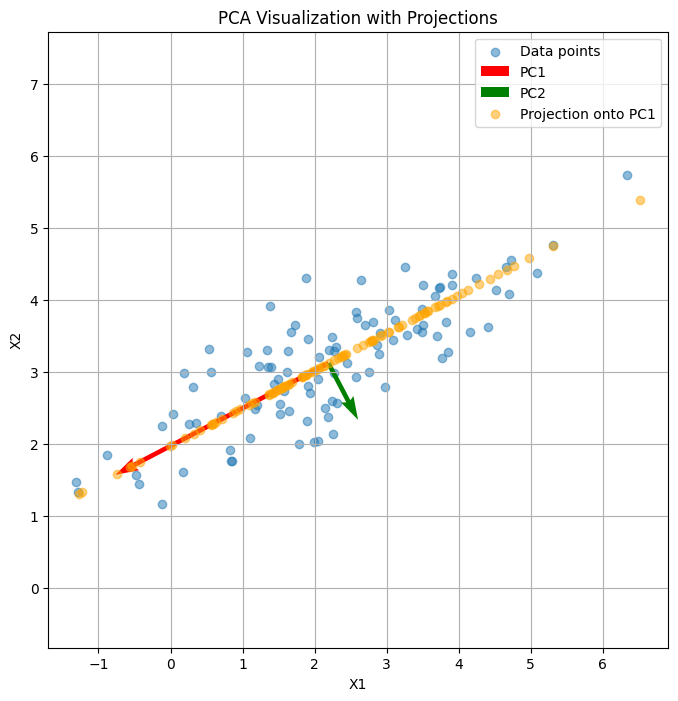

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data
np.random.seed(42)
mean = [2, 3]
cov = [[3, 1.5], [1.5, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Compute PCA manually
X_meaned = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_meaned, rowvar=False)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)
# Sort eigenvectors by eigenvalues
sorted_index = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_index]
eig_vecs = eig_vecs[:, sorted_index]
# Project data onto first PC
X_pca = X_meaned @ eig_vecs

# Plot original data and principal components
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], alpha=0.5, label='Data points')
origin = np.mean(X, axis=0)
for i in range(2):
    plt.quiver(*origin, *eig_vecs[:,i]*np.sqrt(eig_vals[i])*2, angles='xy', scale_units='xy', scale=1, color=['r','g'][i], label=f'PC{i+1}')
    
# Project points onto first PC
pc1_line = np.outer(X_pca[:,0], eig_vecs[:,0])
projected_points = origin + pc1_line
plt.scatter(projected_points[:,0], projected_points[:,1], alpha=0.5, color='orange', label='Projection onto PC1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA Visualization with Projections')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Here’s a visual demonstration of PCA:

* The **scatter points** show the original 2D data.
* The **red and green arrows** are the first and second principal components (PC1 and PC2), indicating directions of maximum variance.
* The **orange points** show the projection of the original data onto **PC1**, effectively reducing the dimensionality from 2D to 1D while retaining the most variance.


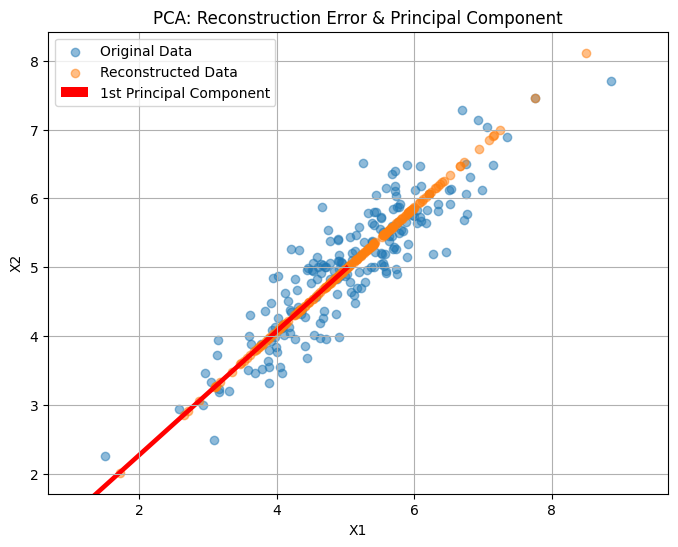

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T + np.array([5, 5])

# Mean center the data
X_centered = X - X.mean(axis=0)

# Compute covariance matrix and eigenvectors/values
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by eigenvalues (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

# Project data onto first principal component
PC1 = eigenvectors[:, 0].reshape(-1, 1)
Z1 = X_centered @ PC1
X_reconstructed = Z1 @ PC1.T + X.mean(axis=0)

# Plot original data, principal component, and reconstruction
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.5, label='Reconstructed Data')
plt.quiver(X.mean(axis=0)[0], X.mean(axis=0)[1],
           PC1[0, 0]*3, PC1[1, 0]*3, color='red', scale=1, label='1st Principal Component')
plt.title("PCA: Reconstruction Error & Principal Component")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

